## Price Prediction using Linear Regression
Predicting prices of used cars using different Linear Regression techinques.

## Importing required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error as mse

## Reading input data
Reading dataframe and identifying features X and target y.

In [2]:
df = pd.read_csv('cars_dataset.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


## Analysis

In [3]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000
mean,2017.073666,16580.158708,23176.517057,116.953407,55.852480,1.635650
std,2.101252,9299.028754,21331.515562,64.045533,17.114391,0.561535
min,1996.000000,495.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10175.000000,7202.500000,30.000000,47.900000,1.200000
50%,2017.000000,14495.000000,17531.000000,145.000000,55.400000,1.600000
75%,2019.000000,20361.000000,32449.000000,145.000000,62.800000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,470.800000,6.600000


In [4]:
df[['model','transmission','fuelType','Make']].nunique()

model           146
transmission      4
fuelType          5
Make              7
dtype: int64

In [5]:
t_map = {}
iter_ = 0
for t_type in df['transmission'].unique():
    t_map[t_type] = iter_
    iter_+=1
    
f_map = {}
iter_ = 0
for f_type in df['fuelType'].unique():
    f_map[f_type] = iter_
    iter_+=1
    
m_map = {}
iter_ = 0
for m_type in df['Make'].unique():
    m_map[m_type] = iter_
    iter_+=1

In [6]:
t_map, f_map, m_map

({'Manual': 0, 'Automatic': 1, 'Semi-Auto': 2, 'Other': 3},
 {'Petrol': 0, 'Diesel': 1, 'Hybrid': 2, 'Other': 3, 'Electric': 4},
 {'audi': 0,
  'BMW': 1,
  'Ford': 2,
  'vw': 3,
  'toyota': 4,
  'skoda': 5,
  'Hyundai': 6})

In [7]:
df.groupby('transmission').count()

,model,year,price,mileage,fuelType,tax,mpg,engineSize,Make
transmission,,,,,,,,,
Automatic,14046,14046,14046,14046,14046,14046,14046,14046,14046
Manual,43021,43021,43021,43021,43021,43021,43021,43021,43021
Other,4,4,4,4,4,4,4,4,4
Semi-Auto,15364,15364,15364,15364,15364,15364,15364,15364,15364


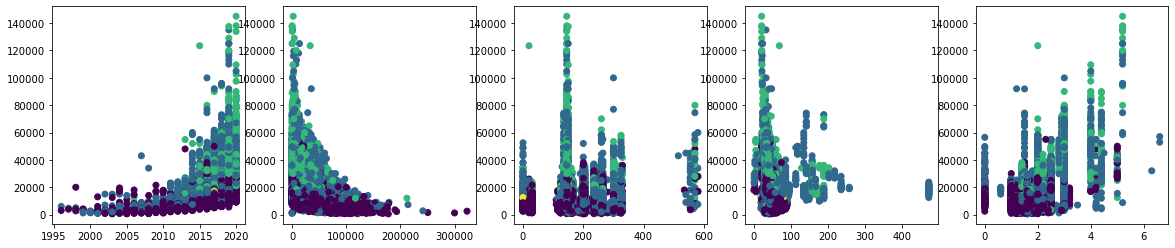

In [8]:
fig,ax = plt.subplots(1,5,figsize=(20,4))
ax[0].scatter(df['year'],df['price'],c=df['transmission'].map(t_map))
ax[1].scatter(df['mileage'].values,df['price'].values,c=df['transmission'].map(t_map))
ax[2].scatter(df['tax'].values,df['price'].values,c=df['transmission'].map(t_map))
ax[3].scatter(df['mpg'].values,df['price'].values,c=df['transmission'].map(t_map))
ax[4].scatter(df['engineSize'].values,df['price'].values,c=df['transmission'].map(t_map))

In [9]:
df.groupby('fuelType').count()

,model,year,price,transmission,mileage,tax,mpg,engineSize,Make
fuelType,,,,,,,,,
Diesel,28918,28918,28918,28918,28918,28918,28918,28918,28918
Electric,5,5,5,5,5,5,5,5,5
Hybrid,2903,2903,2903,2903,2903,2903,2903,2903,2903
Other,239,239,239,239,239,239,239,239,239
Petrol,40370,40370,40370,40370,40370,40370,40370,40370,40370


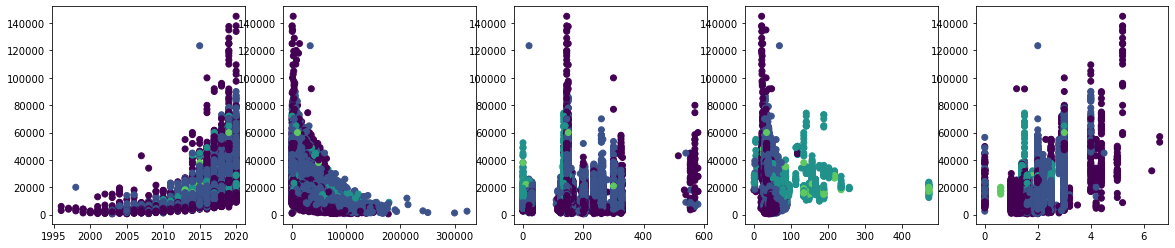

In [10]:
fig,ax = plt.subplots(1,5,figsize=(20,4))
ax[0].scatter(df['year'],df['price'],c=df['fuelType'].map(f_map))
ax[1].scatter(df['mileage'].values,df['price'].values,c=df['fuelType'].map(f_map))
ax[2].scatter(df['tax'].values,df['price'].values,c=df['fuelType'].map(f_map))
ax[3].scatter(df['mpg'].values,df['price'].values,c=df['fuelType'].map(f_map))
ax[4].scatter(df['engineSize'].values,df['price'].values,c=df['fuelType'].map(f_map))

In [11]:
df.groupby('Make').count()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
Make,,,,,,,,,
BMW,10781,10781,10781,10781,10781,10781,10781,10781,10781
Ford,17964,17964,17964,17964,17964,17964,17964,17964,17964
Hyundai,4860,4860,4860,4860,4860,4860,4860,4860,4860
audi,10668,10668,10668,10668,10668,10668,10668,10668,10668
skoda,6267,6267,6267,6267,6267,6267,6267,6267,6267
toyota,6738,6738,6738,6738,6738,6738,6738,6738,6738
vw,15157,15157,15157,15157,15157,15157,15157,15157,15157


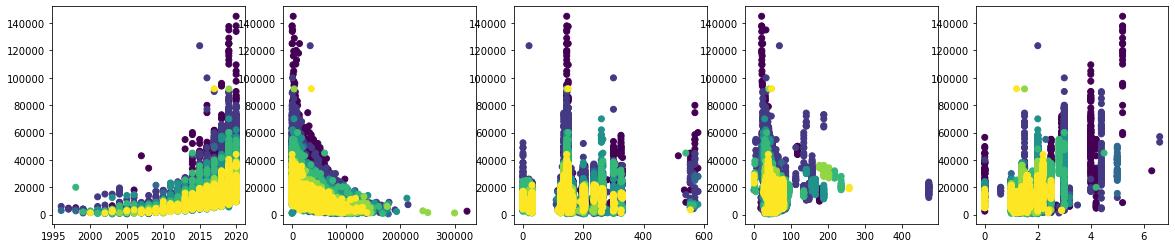

In [12]:
fig,ax = plt.subplots(1,5,figsize=(20,4))
ax[0].scatter(df['year'],df['price'],c=df['Make'].map(m_map))
ax[1].scatter(df['mileage'].values,df['price'].values,c=df['Make'].map(m_map))
ax[2].scatter(df['tax'].values,df['price'].values,c=df['Make'].map(m_map))
ax[3].scatter(df['mpg'].values,df['price'].values,c=df['Make'].map(m_map))
ax[4].scatter(df['engineSize'].values,df['price'].values,c=df['Make'].map(m_map))

## Preprocessing

In [13]:
df_train = df[ ((df.fuelType =='Diesel') | (df.fuelType =='Petrol')) & (df.transmission != 'Other') ]

In [14]:
X = df_train[['year','mileage','tax','mpg','engineSize','transmission','fuelType','Make']]
y = df_train['price']
y = y.values.reshape(-1,1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [16]:
ct_X = ColumnTransformer(
    transformers = [
        ('num_encode',StandardScaler(),[0,1,2,3,4]),
        ('cat_encode',OneHotEncoder(),[5,6,7]) ],
    remainder = 'passthrough',
    sparse_threshold=0)
ct_y = StandardScaler()

In [17]:
X_train = np.array(ct_X.fit_transform(X_train))
y_train = np.array(ct_y.fit_transform(y_train))

## Trying different Algorithms

### Multi Linear Regression

In [18]:
multi_LR = LinearRegression()
multi_LR.fit(X_train,y_train)

LinearRegression()

In [20]:
y_train_pred_mlr = multi_LR.predict(X_train)
train_error = np.sqrt(mse(y_train_pred_mlr,y_train))
train_error

0.4445827304457642

In [22]:
y_test_pred_mlr = multi_LR.predict(ct_X.transform(X_test))
test_error = np.sqrt(mse(y_test_pred_mlr,ct_y.transform(y_test)))
test_error

0.4466332101001581

In [23]:
predictions = ct_y.inverse_transform(y_test_pred_mlr)
predictions

array([[16272.2350616 ],
       [11584.66448936],
       [14459.31200541],
       ...,
       [26672.56821142],
       [ 7435.94762147],
       [31433.20369273]])

### Support Vector Machine(SVM) Regression

In [24]:
svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)

C:\Users\jatin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [25]:
y_train_pred_svr = svr.predict(X_train)

In [26]:
train_error = np.sqrt(mse(y_train,y_train_pred_svr))
train_error

0.27429186980154363

In [27]:
y_test_pred_svr = svr.predict(ct_X.transform(X_test))

In [28]:
test_error = np.sqrt(mse(ct_y.transform(y_test),y_test_pred_svr))
test_error

0.27183855260120077

In [29]:
predictions = ct_y.inverse_transform(y_test_pred_svr)
predictions

array([15256.1656185 , 11858.07825543, 13185.97942368, ...,
       30816.92298693,  6914.89633579, 36051.68307953])

### Decision Tree Regression

In [30]:
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [31]:
y_train_pred_dtr = dtr.predict(X_train)
train_error = np.sqrt(mse(y_train,y_train_pred_dtr))
train_error

0.029763324458308055

In [32]:
y_test_pred_dtr = dtr.predict(ct_X.transform(X_test))
test_error = np.sqrt(mse(ct_y.transform(y_test),y_test_pred_dtr))
test_error

0.2731685807346417

In [34]:
predictions = ct_y.inverse_transform(y_test_pred_dtr)
predictions

array([17395., 11399., 11995., ..., 32448.,  7402., 18750.])

### Random Forrest Regressor

In [35]:
rfr = RandomForestRegressor(n_estimators=11, random_state=0)
rfr.fit(X_train, y_train)

<ipython-input-35-c6427bb3042e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


RandomForestRegressor(n_estimators=11, random_state=0)

In [36]:
y_train_pred_rfr = rfr.predict(X_train)
train_error = np.sqrt(mse(y_train,y_train_pred_rfr))
train_error

0.1007993976090107

In [37]:
y_test_pred_rfr = rfr.predict(ct_X.transform(X_test))
test_error = np.sqrt(mse(ct_y.transform(y_test),y_test_pred_rfr))
test_error

0.22561249977832892

In [38]:
predictions = ct_y.inverse_transform(y_test_pred_rfr)
predictions

array([17239.72727273, 12821.        , 12525.        , ...,
       33160.36363636,  7095.90909091, 30188.90909091])